In [46]:
# libraries
from sklearn.datasets.samples_generator import make_blobs
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import numpy as np

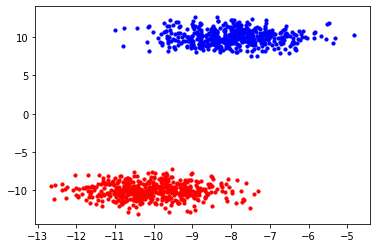

In [15]:
centers = [(-10, -10), (-8, 10)]
cluster_std = [1,1]

X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)


plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

In [15]:
print(y)

[0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0]


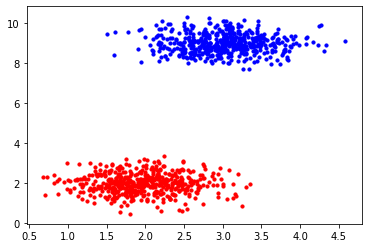

In [17]:
centers = [[2, 2], [3,9]]
X, y =make_blobs(n_samples=1000, n_features=2, centers=centers, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

In [75]:
center_box=(-100, 100)
num_random = np.random.randint(42)
# print("num_random = ", num_random)
for i in range (50):
    print("i = ",i)
    X, y, centers =make_blobs(n_samples=1000, n_features=2, centers = 2, center_box = (-100, 100), cluster_std=5, shuffle=True, random_state=i, return_centers=True)
    print("centers: ", centers)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
    plt.show()

i =  0


TypeError: make_blobs() got an unexpected keyword argument 'return_centers'

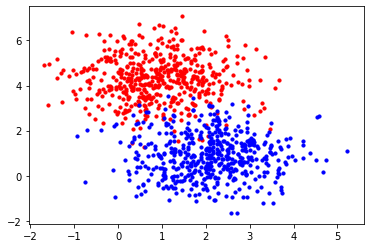

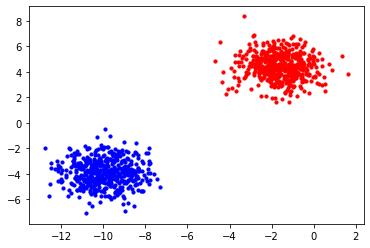

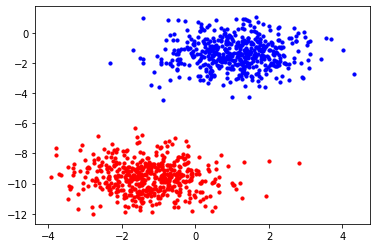

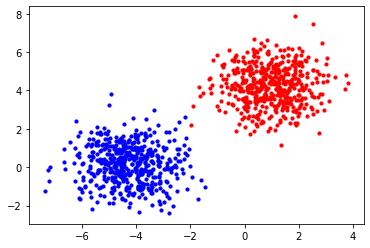

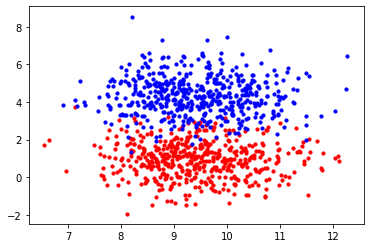

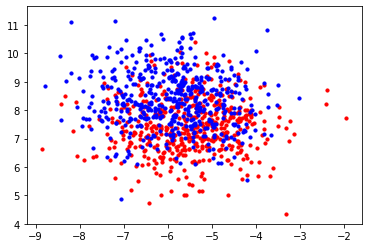

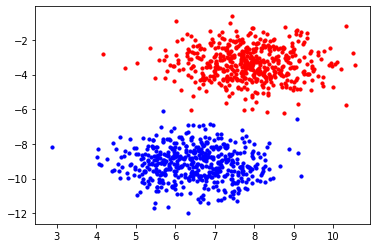

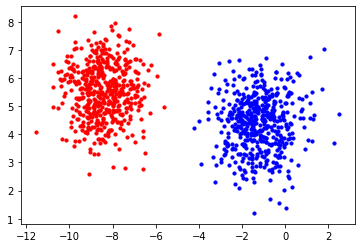

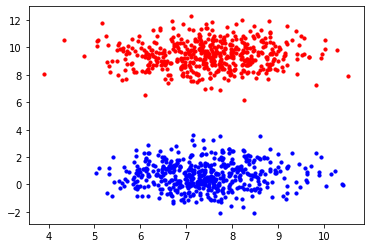

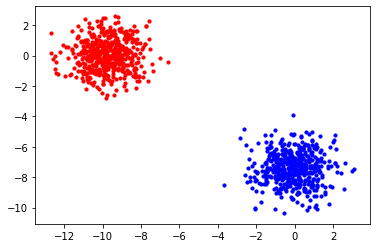

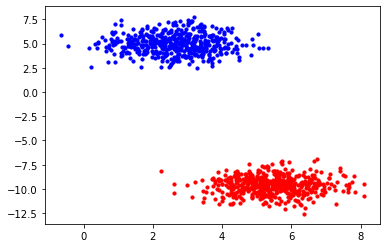

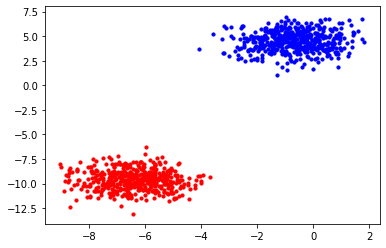

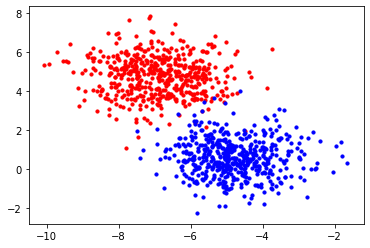

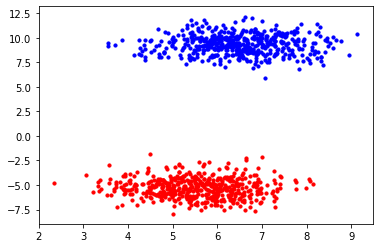

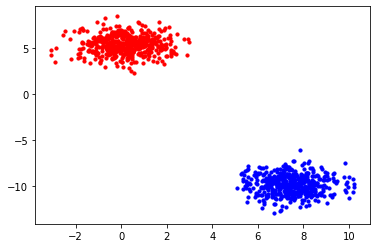

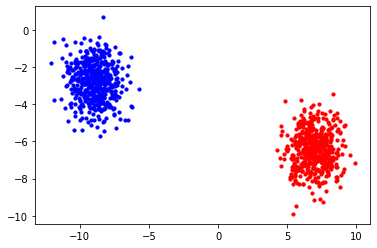

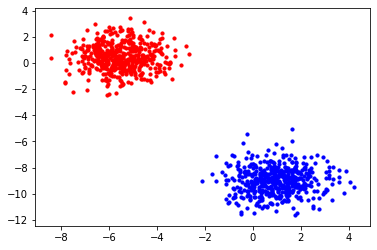

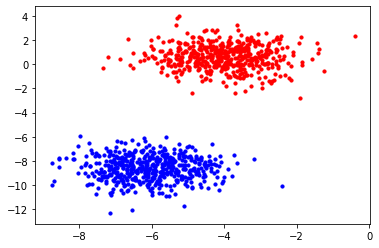

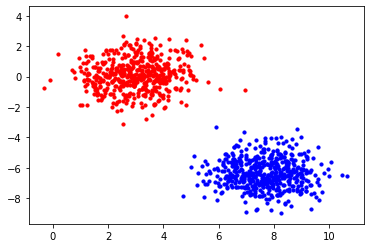

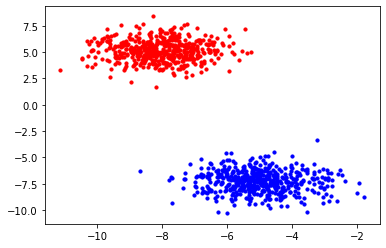

In [70]:

for i in range (20):
    X, y = make_blobs(n_samples=1000, n_features=2, centers = 2, cluster_std=1, shuffle=True, random_state=i)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
    plt.show()

In [25]:
def pairwise_distances(x, y):
    '''
    Input: x is a (N,d) tensor
           y is a (M,d) tensor
    Output: dist is a (N,M) tensor where dist[i,j] is the square L2-norm 
            between x[i,:] and y[j,:] => dist[i,j] = ||x[i,:]-y[j,:]||^2
    '''
    x_norm = (x**2).sum(1).view(-1, 1)
    y_t = torch.transpose(y, 0, 1)
    y_norm = (y**2).sum(1).view(1, -1)
    dist = x_norm + y_norm - 2.0 * torch.mm(x, y_t)
    return torch.clamp(dist, 0.0, np.inf)

In [37]:

t1 = torch.tensor([[1,2],[1,3],[2,1],[3,1]])

print(t1)

t2 = torch.tensor([[1,0], [0,1]])

print(t2)

t_dist = pairwise_distances(t1, t2)
alpha = 0.0001
soft_max = F.softmax(-1.0*alpha*t_dist, dim = 1)

print(t_dist)
print(soft_max)
A = soft_max * t_dist
print(A)
print(torch.sum(soft_max))

tensor([[1, 2],
        [1, 3],
        [2, 1],
        [3, 1]])
tensor([[1, 0],
        [0, 1]])
tensor([[4., 2.],
        [9., 5.],
        [2., 4.],
        [5., 9.]])
tensor([[0.5000, 0.5001],
        [0.4999, 0.5001],
        [0.5001, 0.5000],
        [0.5001, 0.4999]])
tensor([[1.9998, 1.0001],
        [4.4991, 2.5005],
        [1.0001, 1.9998],
        [2.5005, 4.4991]])
tensor(4.)


In [33]:
print(torch.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [47]:
X = np.array([[25,30],[-50,-75]])
X_abs = np.absolute(X) 
print(X_abs)
x_max = np.max(X_abs)
X_scaled = X/x_max
print(X_scaled)

[[25 30]
 [50 75]]
[[ 0.33333333  0.4       ]
 [-0.66666667 -1.        ]]


In [ ]:
n=5
X_max = np.repeat(X_max[np.newaxis,:], n, 0)